In [215]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [216]:
face_cascade = cv2.CascadeClassifier(r"D:\Users\kaifa\Desktop\KAIF\CODE\ML Project Image Classifier\model\OpenCV\haarcascades\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"D:\Users\kaifa\Desktop\KAIF\CODE\ML Project Image Classifier\model\OpenCV\haarcascades\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces

array([[ 18,  14, 151, 151]])

In [298]:
img = cv2.imread(r"D:\Users\kaifa\Desktop\KAIF\CODE\ML Project Image Classifier\model\Testimages\ronniecr.jpg")
img.shape

(1367, 736, 3)

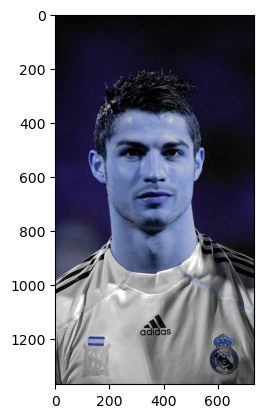

In [299]:
plt.imshow(img)

In [300]:
face_cascade = cv2.CascadeClassifier(r"D:\Users\kaifa\Desktop\KAIF\CODE\ML Project Image Classifier\model\OpenCV\haarcascades\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"D:\Users\kaifa\Desktop\KAIF\CODE\ML Project Image Classifier\model\OpenCV\haarcascades\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces

array([[142, 347, 437, 437]])

In [301]:
(x,y,w,h) = faces[0]
x,y,w,h

(142, 347, 437, 437)

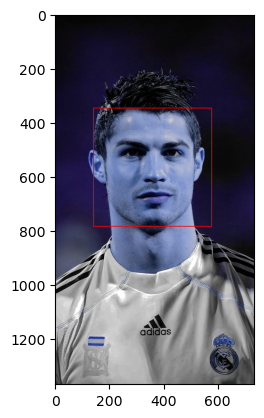

In [302]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

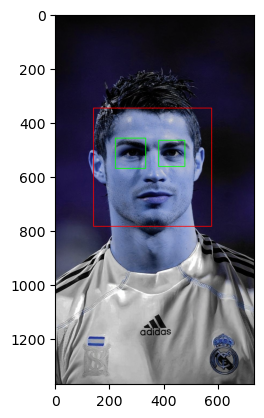

In [303]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

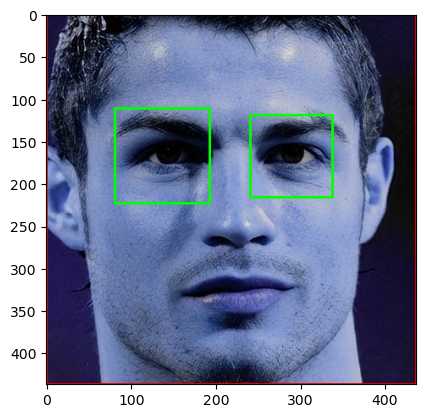

In [304]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [325]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


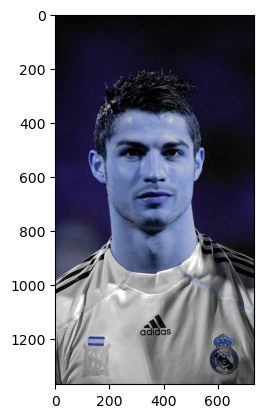

In [326]:
original_image = cv2.imread(r"D:\Users\kaifa\Desktop\KAIF\CODE\ML Project Image Classifier\model\Testimages\ronniecr.jpg")
plt.imshow(original_image)

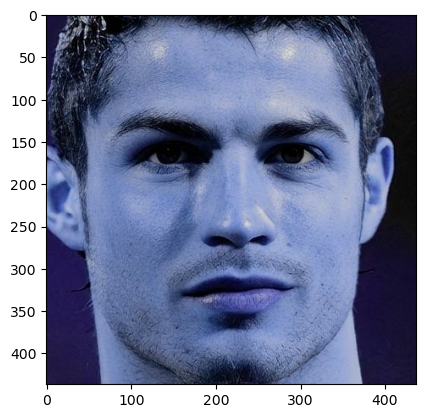

In [327]:
cropped_image = get_cropped_image_if_2_eyes(r"D:\Users\kaifa\Desktop\KAIF\CODE\ML Project Image Classifier\model\Testimages\ronniecr.jpg")
plt.imshow(cropped_image)

In [95]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [333]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [334]:
img_dirs

['./dataset/Cristiano Ronaldo',
 './dataset/Lionel Messi',
 './dataset/Roger Federer',
 './dataset/Virat Kohli']

In [335]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [338]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count=1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name]=[]

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path=cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count +=1

Cristiano Ronaldo
Generating cropped images in folder:  ./dataset/cropped/Cristiano Ronaldo
Lionel Messi
Generating cropped images in folder:  ./dataset/cropped/Lionel Messi
Roger Federer
Generating cropped images in folder:  ./dataset/cropped/Roger Federer
Virat Kohli
Generating cropped images in folder:  ./dataset/cropped/Virat Kohli


In [339]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

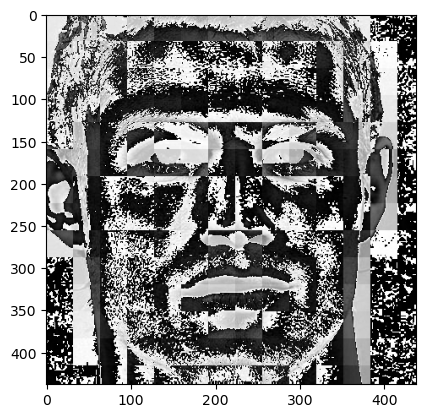

In [340]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [341]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict
 

{'Cristiano Ronaldo': 0,
 'Lionel Messi': 1,
 'Roger Federer': 2,
 'Virat Kohli': 3}

In [342]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        #in the case that you have removed some images manually or regardless 
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [343]:
len(X)

67

In [344]:
len(X[0])#32*32*3 +32*32

4096

In [345]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(67, 4096)

In [346]:
X[0]

array([ 51.,  50.,  53., ...,  98., 198., 237.])

In [347]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pipe = Pipeline([('scaler' ,MinMaxScaler()), ('svc', SVC(kernel = 'linear', C = 1E5))])
pipe.fit(X_train_scaled, y_train)
pipe.score(X_test, y_test)

0.6470588235294118

In [349]:
print(classification_report(y_test, pipe.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.12      1.00      0.22         1
           1       0.89      0.80      0.84        10
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1

    accuracy                           0.53        17
   macro avg       0.25      0.45      0.27        17
weighted avg       0.53      0.53      0.51        17



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [350]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [351]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [352]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.62,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.64,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.66,{'logisticregression__C': 1}


In [353]:
best_estimators['svm'].score(X_test,y_test)

0.5294117647058824

In [354]:
best_estimators['random_forest'].score(X_test,y_test)

0.4117647058823529

In [355]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8235294117647058

In [356]:
best_clf=best_estimators['logistic_regression']

In [357]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[1, 0, 0, 0],
       [1, 7, 2, 0],
       [0, 0, 5, 0],
       [0, 0, 0, 1]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

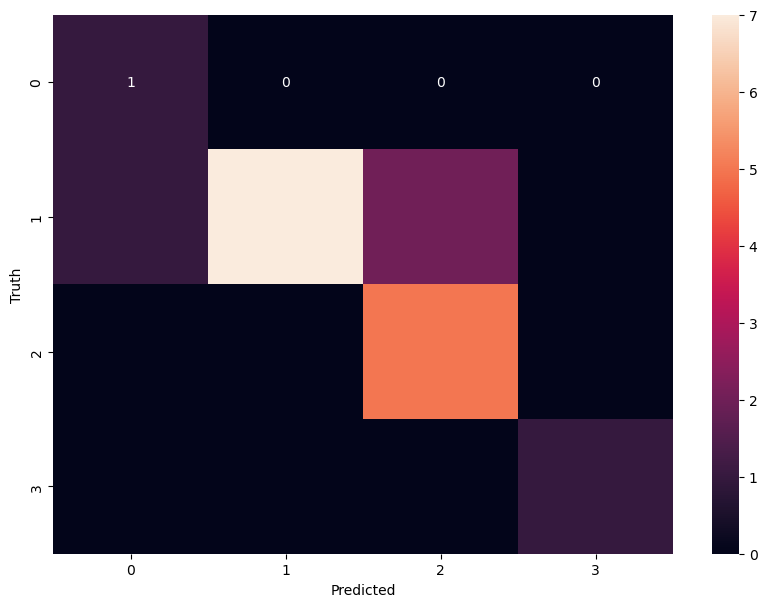

In [358]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [359]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [361]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))